### 引言
TA-Lib，全称“Technical Analysis Library”, 即技术分析库，是Python金融量化的高级库，涵盖了150多种股票、期货交易软件中常用的技术分析指标，如MACD、RSI、KDJ、动量指标、布林带等等。TA-Lib可分为10个子板块：Overlap Studies(重叠指标)，Momentum Indicators(动量指标)，Volume Indicators(交易量指标)，Cycle Indicators(周期指标)，Price Transform(价格变换)，Volatility Indicators(波动率指标)，Pattern Recognition(模式识别)，Statistic Functions(统计函数)，Math Transform(数学变换)和Math Operators(数学运算)，见下图。[【手把手教你】股市技术分析利器之TA-Lib（一）](https://mp.weixin.qq.com/s/nLOCNim0XRjqs_2iLDMO8Q)主要探讨了重叠指标的相关原理与Python实现，[【手把手教你】股市技术分析利器之TA-Lib（二）](https://mp.weixin.qq.com/s/L4TnfSclYEEqXOtVbhE3QA) 则着重介绍TA-Lib中强大的数学运算、数学变换、统计函数、价格变换、周期指标和波动率指标函数及其应用实例，本文延续该序列，探讨talib的其他指标及其运用。

### TA-Lib安装

安装：在cmd上使用“pip install talib”命令一般会报错，正确安装方法是，进入[下载地址](https://www.lfd.uci.edu/~gohlke/pythonlibs/) ，下拉选择，比如win系统64位，python3.7版本，选择TA_Lib-0.4.17-cp37-cp37m-win_amd64.whl，将下载包放在当前工作路径中，然后在Anaconda Prompt（或windows的cmd）里面输入命令：pip install TA_Lib-0.4.17-cp27-cp27m-win_amd64.whl。  
使用：import talib as ta

In [2]:
#先引入后面可能用到的包（package）
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
#注意下面的%命令只能在jupyter notebook上运行，否则需要删除或注释掉
%matplotlib inline   

#正常显示画图时出现的中文和负号
from pylab import mpl
mpl.rcParams['font.sans-serif']=['SimHei']
mpl.rcParams['axes.unicode_minus']=False

In [3]:
#引入TA-Lib库
import talib as ta

In [184]:
import tushare as ts
df=ts.get_k_data('sh',start='2000-01-01')
df.index=pd.to_datetime(df.date)
df=df.sort_index()
df['ret']=df.close/df.close.shift(1)-1
df.head()

,date,open,close,high,low,volume,code,ret
date,,,,,,,,
2000-01-04,2000-01-04,1368.69,1406.37,1407.52,1361.21,9034020.0,sh,NaN
2000-01-05,2000-01-05,1407.83,1409.68,1433.78,1398.32,10580000.0,sh,0.002354
2000-01-06,2000-01-06,1406.04,1463.94,1463.95,1400.25,13480500.0,sh,0.038491
2000-01-07,2000-01-07,1477.15,1516.60,1522.82,1477.15,34515700.0,sh,0.035971
2000-01-10,2000-01-10,1531.71,1545.11,1546.72,1506.40,31253500.0,sh,0.018799


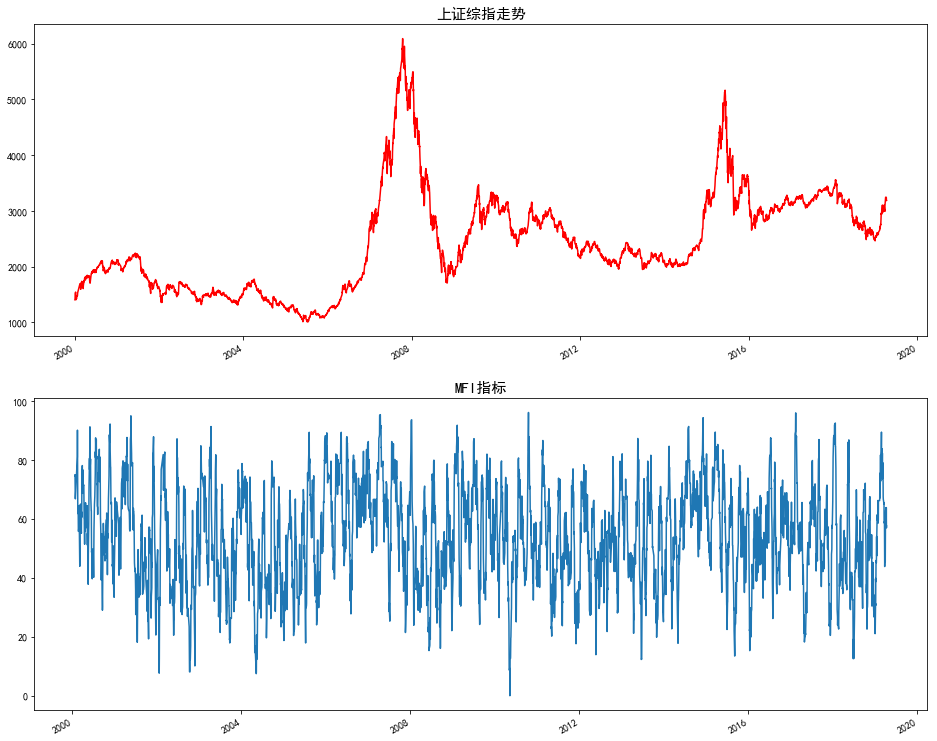

In [185]:
high,low,close,volume=df.high.values,df.low.values,df.close.values,df.volume.values
df['mfi']=ta.MFI(high, low, close, volume, timeperiod=14)
plt.figure(figsize=(16,14))
plt.subplot(211)
df['close'].plot(color='r')
plt.xlabel('')
plt.title('上证综指走势',fontsize=15)
plt.subplot(212)
df['mfi'].plot()
plt.title('MFI指标',fontsize=15)
plt.xlabel('')
plt.show()

计算方法  

1.典型价格（TP）=当日最高价、最低价与收盘价的算术平均值  

2.货币流量（MF）=典型价格（TP）×N日内成交量  

3.如果当日MF>昨日MF，则将当日的MF值视为正货币流量（PMF）  

4.如果当日MF<昨日MF，则将当日的MF值视为负货币流量（NMF）  
 
5.MFI=100-[100/(1+PMF/NMF)]  

6.参数N一般设为14日。  

应用法则  

1.显示超买超卖是MFI指标最基本的功能。当MFI>80时为超买，在其回头向下跌破80时，为短线卖出时机。

2.当MFI<20时为超卖，当其回头向上突破20时，为短线买进时机。

3.当MFI>80，而产生背离现象时，视为卖出信号。

4.当MFI<20，而产生背离现象时，视为买进信号。

注意要点

1.经过长期测试，MFI指标的背离讯号更能忠实的反应股价的反转现象。一次完整的波段行情，至少都会维持一定相当的时间，反转点出现的次数并不会太多。

2.将MFI指标的参数设定为14天时，其背离讯号产生的时机，大致上都能和股价的顶点吻合。因此在使用MFI指标时，参数设定方面应尽量维持14日的原则。
熔融流动指数:MFI,无纺布熔融喷丝中常用参数。

In [186]:
#当前日的MFI<20，而当日的MFI>20时，买入信号设置为1
for i in range(15,len(df)):
    if df['mfi'][i]>20 and df['mfi'][i-1]<20:
        df.loc[df.index[i],'收盘信号']=1
    if df['mfi'][i]<80 and df['mfi'][i-1]>80:
        df.loc[df.index[i],'收盘信号']=0

In [187]:
#计算每天的仓位，当天持有上证指数时，仓位为1，当天不持有上证指数时，仓位为0
pd.options.mode.chained_assignment = None
df['当天仓位']=df['收盘信号'].shift(1)
df['当天仓位'].fillna(method='ffill',inplace=True)

In [188]:
from datetime import datetime,timedelta
d=df[df['当天仓位']==1].index[0]-timedelta(days=1)
df_new=df.loc[d:]
df_new['ret'][0]=0
df_new['当天仓位'][0]=0

In [189]:
#当仓位为1时，买入上证指数，当仓位为0时，空仓，计算资金指数
df_new['资金指数']=(df_new.ret*df['当天仓位']+1.0).cumprod()
df_new['指数净值']=(df_new.ret+1.0).cumprod()

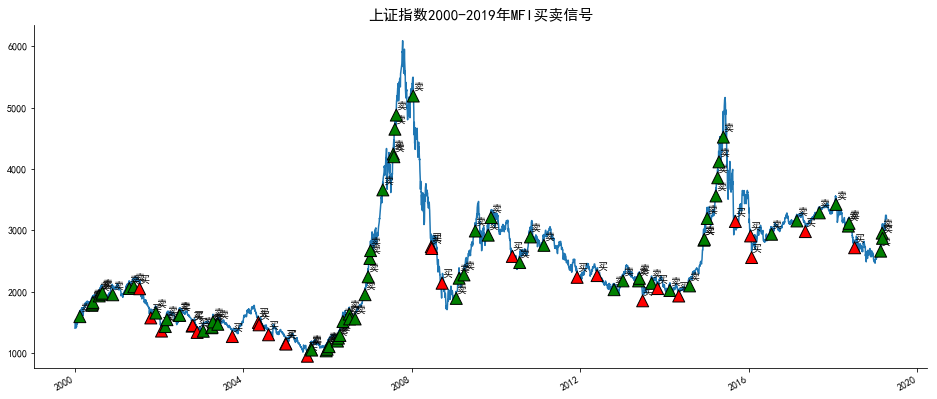

In [190]:
df.close.plot(figsize=(16,7))
for i in range(len(df)):
    if df['收盘信号'][i]==1:
        plt.annotate('买',xy=(df.index[i],df.close[i]),arrowprops=dict(facecolor='r',shrink=0.05))
    if df['收盘信号'][i]==0:
        plt.annotate('卖',xy=(df.index[i],df.close[i]),arrowprops=dict(facecolor='g',shrink=0.1))    
plt.title('上证指数2000-2019年MFI买卖信号',size=15)
plt.xlabel('')
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

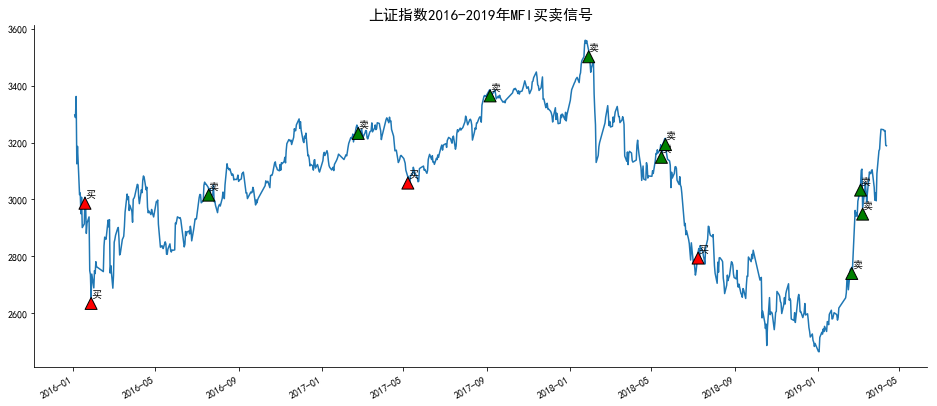

In [191]:
#查看最近两年情况
df1=df.loc['2016-01-01':,]
df1.close.plot(figsize=(16,7))
for i in range(len(df1)):
    if df1['收盘信号'][i]==1:
        plt.annotate('买',xy=(df1.index[i],df1.close[i]),arrowprops=dict(facecolor='r',shrink=0.05))
    if df1['收盘信号'][i]==0:
        plt.annotate('卖',xy=(df1.index[i],df1.close[i]),arrowprops=dict(facecolor='g',shrink=0.1))    
plt.title('上证指数2016-2019年MFI买卖信号',fontsize=15)
plt.xlabel('')
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [192]:
df1['策略净值']=(df1.ret*df1['当天仓位']+1.0).cumprod()
df1['指数净值']=(df1.ret+1.0).cumprod()

In [193]:
df1['策略收益率']=df1['策略净值']/df1['策略净值'].shift(1)-1
df1['指数收益率']=df1.ret
total_ret=df1[['策略净值','指数净值']].iloc[-1]-1
annual_ret=pow(1+total_ret,250/len(df_new))-1
dd=(df1[['策略净值','指数净值']].cummax()-df1[['策略净值','指数净值']])/df1[['策略净值','指数净值']].cummax()
d=dd.max()
beta=df1[['策略收益率','指数收益率']].cov().iat[0,1]/df1['指数收益率'].var()
alpha=(annual_ret['策略净值']-annual_ret['指数净值']*beta)
exReturn=df1['策略收益率']-0.03/250
sharper_atio=np.sqrt(len(exReturn))*exReturn.mean()/exReturn.std()
TA1=round(total_ret['策略净值']*100,2)
TA2=round(total_ret['指数净值']*100,2)
AR1=round(annual_ret['策略净值']*100,2)
AR2=round(annual_ret['指数净值']*100,2)
MD1=round(d['策略净值']*100,2)
MD2=round(d['指数净值']*100,2)
S=round(sharper_atio,2)
print(f'累计收益率：策略{TA1}%，指数{TA2}%;\n年化收益率：策略{AR1}%，指数{AR2}%；\n\
最大回撤：  策略{MD1}%，指数{MD2}%;\n策略alpha: {round(alpha,2)}，策略beta：{round(beta,2)}; \n夏普比率：  {S}')

累计收益率：策略-7.46%，指数-9.9%;
年化收益率：策略-0.45%，指数-0.6%；
最大回撤：  策略21.01%，指数30.77%;
策略alpha: -0.0，策略beta：0.62; 
夏普比率：  -0.26


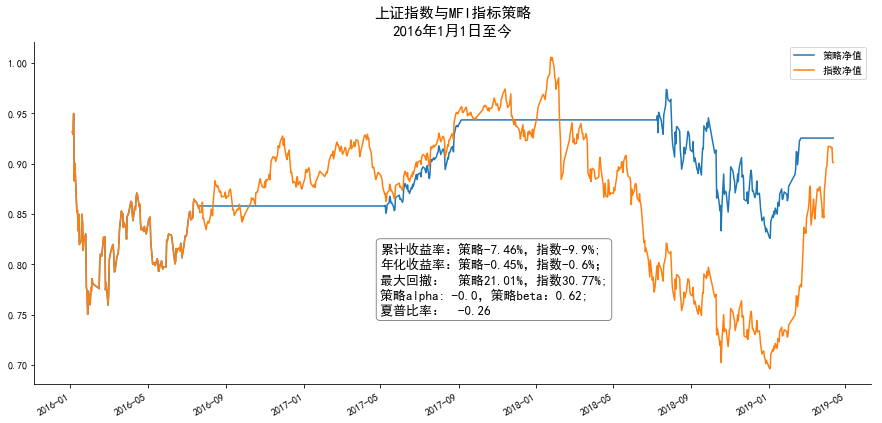

In [194]:
df1[['策略净值','指数净值']].plot(figsize=(15,7))
plt.title('上证指数与MFI指标策略\n2016年1月1日至今',size=15)

bbox = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)

plt.text('2017-05-01', 0.75, f'累计收益率：策略{TA1}%，指数{TA2}%;\n年化收益率：策略{AR1}%，指数{AR2}%；\n\
最大回撤：  策略{MD1}%，指数{MD2}%;\n策略alpha: {round(alpha,2)}，策略beta：{round(beta,2)}; \n夏普比率：  {S}',\
         size=13,bbox=bbox)  
plt.xlabel('')
ax=plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
plt.show()

In [195]:
def get_data(code,date):
    df=ts.get_k_data(code,start=date)
    df.index=pd.to_datetime(df.date)
    df=df.sort_index()
    df['ret']=df.close/df.close.shift(1)-1
    return df

In [241]:
#关掉pandas的warnings
pd.options.mode.chained_assignment = None
def strategy(code,date,L,H):
    df=get_data(code,date)
    high,low,close,volume=df.high.values,df.low.values,df.close.values,df.volume.values
    df['mfi']=ta.MFI(high, low, close, volume, timeperiod=14)
    for i in range(14,len(df)):
        if df['mfi'][i]>L and df['mfi'][i-1]<L:
            df.loc[df.index[i],'收盘信号']=1
        if df['mfi'][i]<H and df['mfi'][i-1]>H:
            df.loc[df.index[i],'收盘信号']=0

    df['当天仓位']=df['收盘信号'].shift(1)
    df['当天仓位'].fillna(method='ffill',inplace=True)
    
    
    d=df[df['当天仓位']==1].index[0]-timedelta(days=1)
    df1=df.loc[d:]
    df1['ret'][0]=0
    df1['当天仓位'][0]=0
    #当仓位为1时，买入上证指数，当仓位为0时，空仓，计算资金指数
    df1['策略净值']=(df1.ret.values*df1['当天仓位'].values+1.0).cumprod()
    df1['指数净值']=(df1.ret.values+1.0).cumprod()
    df1['策略收益率']=df1['策略净值']/df1['策略净值'].shift(1)-1
    df1['指数收益率']=df1.ret
    total_ret=df1[['策略净值','指数净值']].iloc[-1]-1
    annual_ret=pow(1+total_ret,250/len(df_new))-1
    dd=(df1[['策略净值','指数净值']].cummax()-df1[['策略净值','指数净值']])/df1[['策略净值','指数净值']].cummax()
    d=dd.max()
    beta=df1[['策略收益率','指数收益率']].cov().iat[0,1]/df1['指数收益率'].var()
    alpha=(annual_ret['策略净值']-annual_ret['指数净值']*beta)
    exReturn=df1['策略收益率']-0.03/250
    sharper_atio=np.sqrt(len(exReturn))*exReturn.mean()/exReturn.std()
    TA1=round(total_ret['策略净值']*100,2)
    TA2=round(total_ret['指数净值']*100,2)
    AR1=round(annual_ret['策略净值']*100,2)
    AR2=round(annual_ret['指数净值']*100,2)
    MD1=round(d['策略净值']*100,2)
    MD2=round(d['指数净值']*100,2)
    S=round(sharper_atio,2)
    df1[['策略净值','指数净值']].plot(figsize=(15,7))
    plt.title('上证指数与MFI指标策略\n'+date+'至今',size=15)
    bbox = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
    plt.text(df1.index[int(len(df1)/5)], df1['指数净值'].max()/1.5, f'累计收益率：\
策略{TA1}%，指数{TA2}%;\n年化收益率：策略{AR1}%，指数{AR2}%；\n最大回撤：  策略{MD1}%，指数{MD2}%;\n\
策略alpha: {round(alpha,2)}，策略beta：{round(beta,2)}; \n夏普比率：  {S}',size=13,bbox=bbox)  
    plt.xlabel('')
    ax=plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    plt.show()

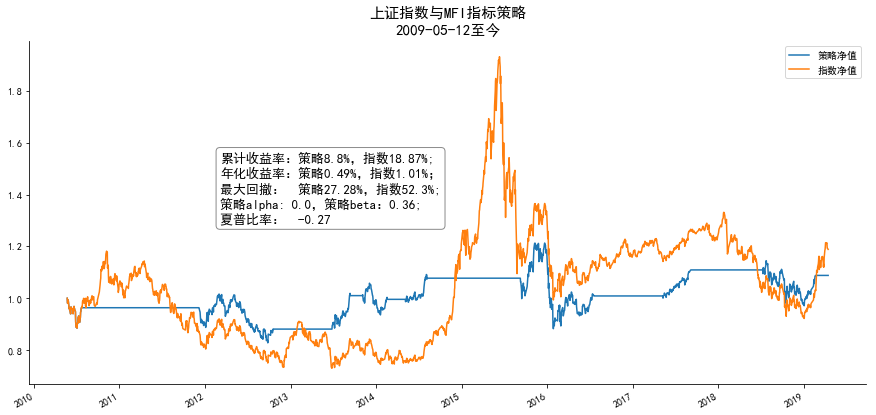

In [242]:
strategy('sh','2009-05-12',20,80)

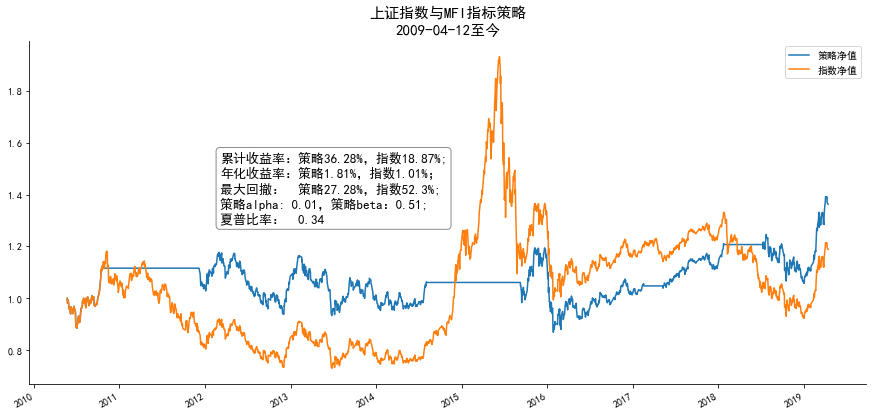

In [243]:
strategy('sh','2009-04-12',20,90)

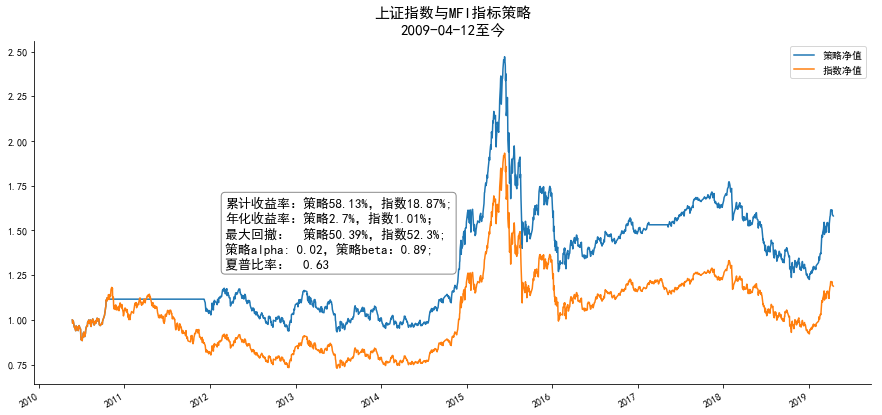

In [244]:
strategy('sh','2009-04-12',20,95)

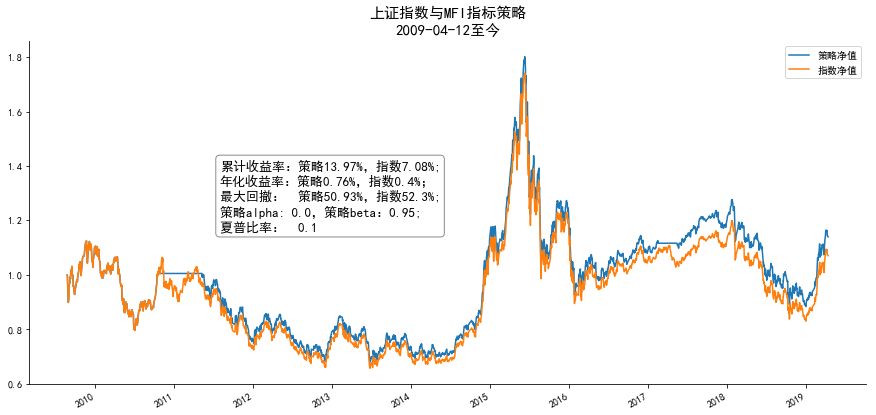

In [246]:
strategy('sh','2009-04-12',30,95)

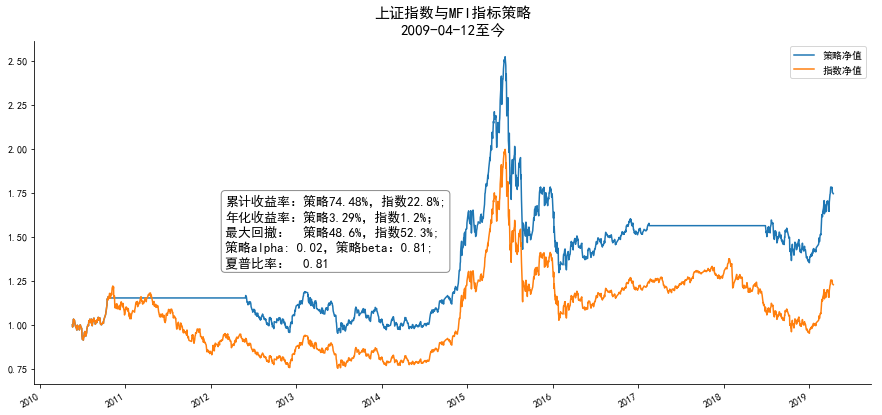

In [247]:
strategy('sh','2009-04-12',15,95)

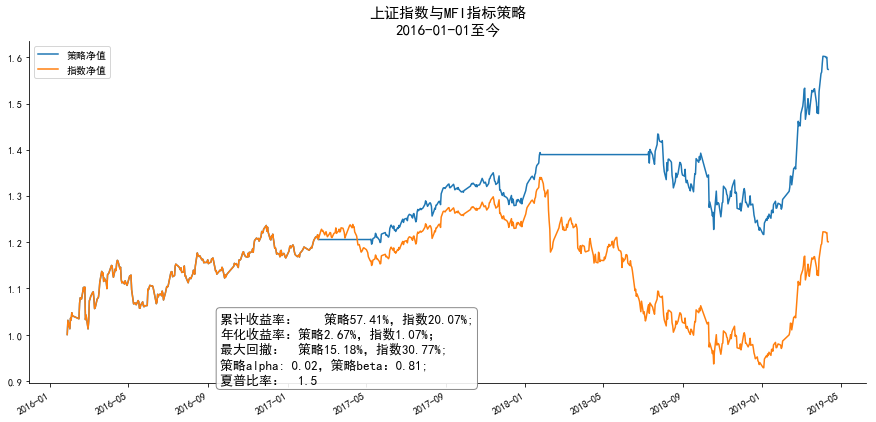

In [230]:
strategy('sh','2016-01-01',20,90)

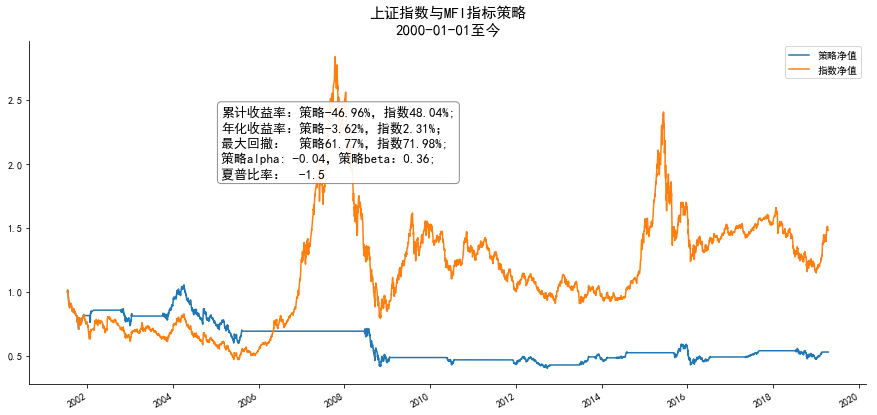

In [248]:
strategy('sh','2000-01-01',20,80)

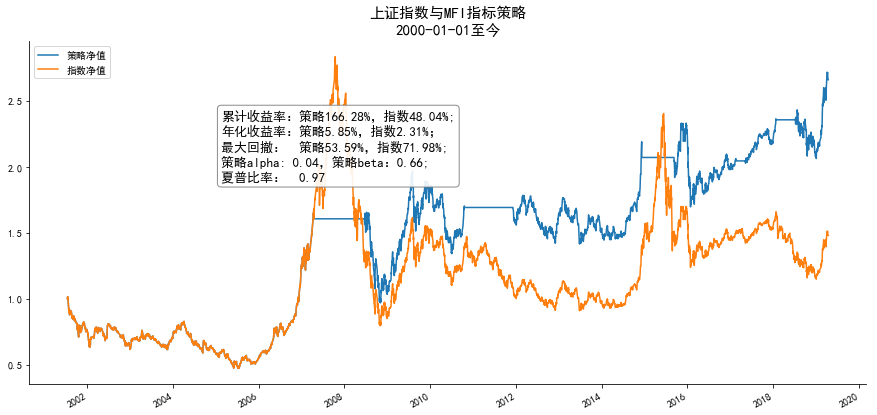

In [249]:
strategy('sh','2000-01-01',20,92)

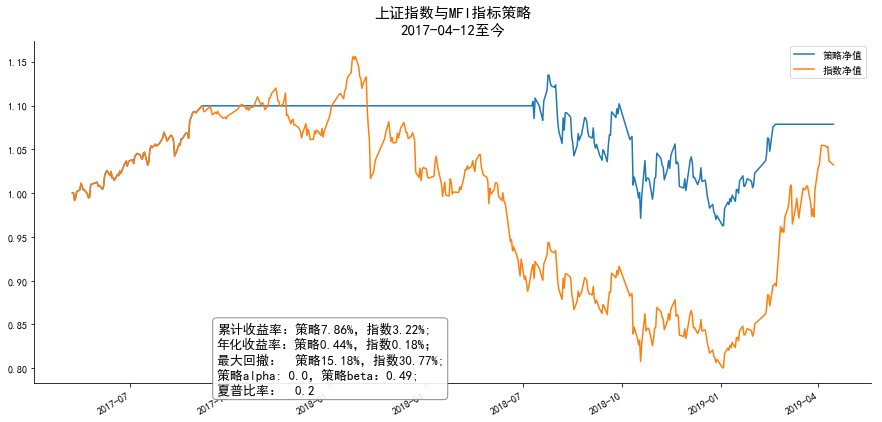

In [250]:
strategy('sh','2017-04-12',20,80)

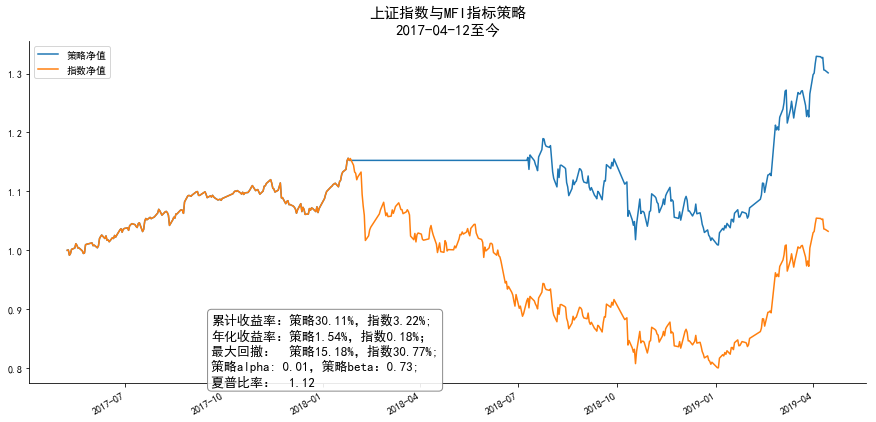

In [251]:
strategy('sh','2017-04-12',20,92)

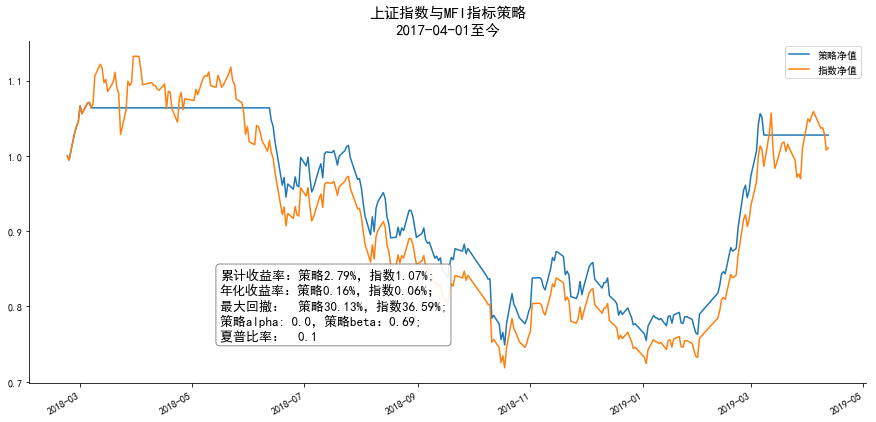

In [252]:
strategy('cyb','2017-04-01',20,80)

### 指标如何使用？ 

在指标运用中，不少交易者会产生困惑，有时指标严重超买，股价却继续上涨，或指标严重超卖，股价仍未止跌企稳。其实这是混淆了技术指标与股价的关系，指标并不能决定股价涨跌，股价才决定指标的大小，股价是因，指标是果，由因可推出果，但由果来导出因可能不准确。既然那样，技术指标还有什么用呢？

其实技术分析就如温度计，能够测量当前温度，却不能预测也不能决定未来温度。换句话说，技术指标虽不能预测未来走势，但可以衡量当前市场交投情况，用于确认趋势。也就是说技术指标可以作为辅助参考作用，当股价趋势继续上涨或下跌时，指标也将继续超买或超卖，而当股价一旦发生转势，指标随后也会发生转势买卖信号，为仓位管理和择时提供技术上的参考。